In [1]:
from keras import models, optimizers, losses
from keras import backend as K
from keras.utils import Progbar
from utils import *
from network import *
from metrics import *
from matplotlib import pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
train_low, train_high, val_low, val_high, test_low = data_loader_v3('./interpolation/')
print("Train X's shape : ", train_low.shape)
print("Train Y's shape : ", train_high.shape)
print("Validation X's shape : ", val_low.shape)
print("Validation Y's shape : ", val_high.shape)
print("Test X's shape : ", test_low.shape)

Train X's shape :  (303, 320, 256, 3)
Train Y's shape :  (303, 320, 256, 12)
Validation X's shape :  (25, 320, 256, 3)
Validation Y's shape :  (25, 320, 256, 12)
Test X's shape :  (342, 320, 256, 3)


In [13]:
checkpoint_list = sorted(os.listdir('./checkpoint/case3/dense'))
checkpoint_list = [float(i.split('_')[1][:-3]) for i in checkpoint_list]

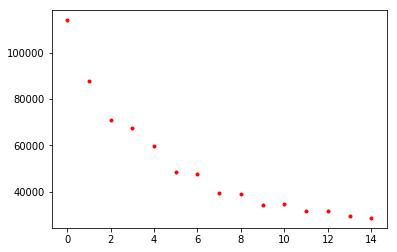

In [15]:
plt.plot(checkpoint_list, 'r.')

In [16]:
A = models.load_model('./checkpoint/case3/dense/1500_28700.89.h5', compile=False)

In [18]:
A.compile(optimizer=optimizers.Adam(lr=0.0001, epsilon=1e-8), loss=[losses.mean_squared_error, losses.binary_crossentropy], loss_weights=[50, 1])

In [25]:
A.output

[<tf.Tensor 'conv2d_6/Relu:0' shape=(?, ?, ?, 12) dtype=float32>,
 <tf.Tensor 'model_2/dense_1/Sigmoid:0' shape=(?, 1) dtype=float32>]

In [28]:
A.test_on_batch(val_low, [val_high, np.ones((len(val_low), 1))])

[96876.484, 1937.5297, 2.4318712e-07]

In [5]:
train_, _ = A.predict(train_low)
val_, _ = A.predict(val_low)
print(train_.shape)
print(val_.shape)

(303, 320, 256, 6)
(25, 320, 256, 6)


In [35]:
train_mse = MSE(train_high, train_)
train_rmse = RMSE(train_high, train_)
train_rmspe = RMSPE(train_high, train_)
train_psnr = PSNR(train_high, train_, 65535)

print(train_mse.shape, train_mse.mean())
print(train_rmse.shape, train_rmse.mean())
print(train_rmspe.shape, train_rmspe.mean())
print(train_psnr.shape, train_psnr.mean())

(303, 6) 1264.6795439560594
(303, 6) 32.636808728096646
(303, 6) 3.5893692097179297
(303, 6) 66.77439599780611


In [34]:
val_mse = MSE(val_high, val_)
val_rmse = RMSE(val_high, val_)
val_rmspe = RMSPE(val_high, val_)
val_psnr = PSNR(val_high, val_, 65535)

print(val_mse.shape, val_mse.mean())
print(val_rmse.shape, val_rmse.mean())
print(val_rmspe.shape, val_rmspe.mean())
print(val_psnr.shape, val_psnr.mean())

(25, 6) 1742.5762055426292
(25, 6) 39.38365392583606
(25, 6) 4.551850361989916
(25, 6) 64.94743179710387


$$
MSE = \frac{1}{n} \sum^n{(y-\hat{y})^2}
$$

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum^n{(y-\hat{y})^2}}
$$

$$
RMSPE = \sqrt{\frac{1}{n} \sum^n({\frac{y-\hat{y}}{y}})^2}
$$

$$
PSNR = 10\log_{10}(\frac{MAX}{\sqrt{MSE}}) = 20\log_{10}{MAX} - 10\log_{10}\sqrt{MSE}
$$

$$
SSIM = I(x,y)C(x,y)S(x,y)
$$